In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [3]:
df = pd.read_csv('middle_tn_schools.csv')
df.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


In [4]:
df.shape

(347, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 347 non-null    object 
 1   school_rating        347 non-null    float64
 2   size                 347 non-null    float64
 3   reduced_lunch        347 non-null    float64
 4   state_percentile_16  347 non-null    float64
 5   state_percentile_15  341 non-null    float64
 6   stu_teach_ratio      347 non-null    float64
 7   school_type          347 non-null    object 
 8   avg_score_15         341 non-null    float64
 9   avg_score_16         347 non-null    float64
 10  full_time_teachers   347 non-null    float64
 11  percent_black        347 non-null    float64
 12  percent_white        347 non-null    float64
 13  percent_asian        347 non-null    float64
 14  percent_hispanic     347 non-null    float64
dtypes: float64(13), object(2)
memory usage: 

In [16]:
df.isnull().sum()

name                   0
school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    6
stu_teach_ratio        0
school_type            0
avg_score_15           6
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
school_type_encoded    0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

name                   0
school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    0
stu_teach_ratio        0
school_type            0
avg_score_15           0
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
school_type_encoded    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['school_type_encoded'] = label_encoder.fit_transform(df['school_type'])
df['school_type_encoded']

/var/folders/_3/_v4n07zn5j576jx91v7j3kmc0000gn/T/ipykernel_46613/2715752258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['school_type_encoded'] = label_encoder.fit_transform(df['school_type'])


0      0
1      0
2      0
3      2
4      0
      ..
342    0
343    0
344    0
345    0
346    0
Name: school_type_encoded, Length: 341, dtype: int64

school_rating


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


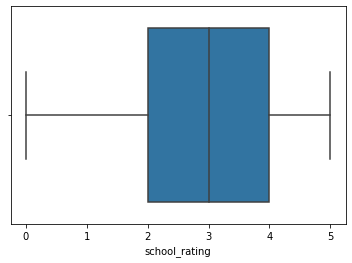

reduced_lunch


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


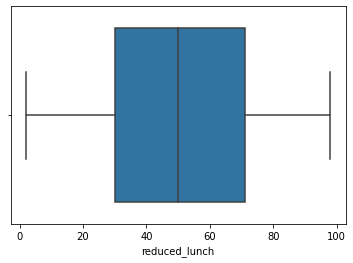

state_percentile_16


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


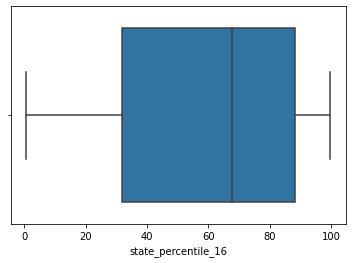

state_percentile_15


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


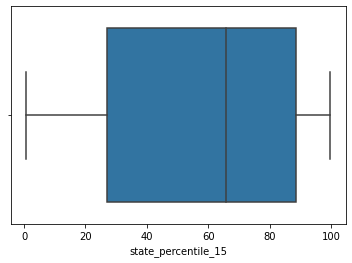

stu_teach_ratio


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


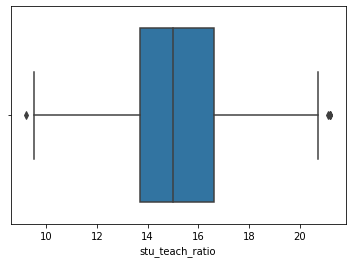

avg_score_15


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


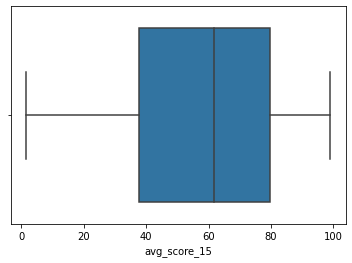

avg_score_16


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


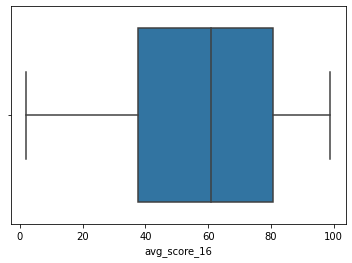

full_time_teachers


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


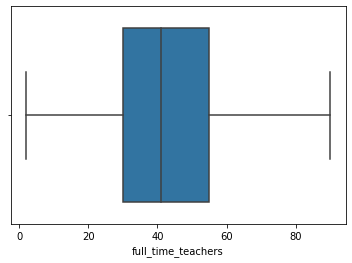

percent_black


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


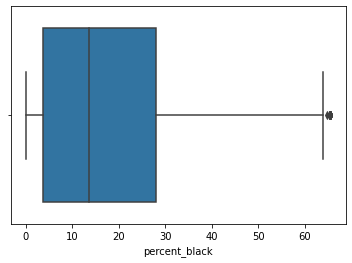

percent_white


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


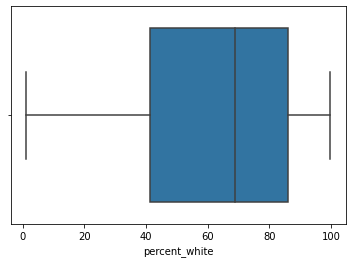

percent_asian


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


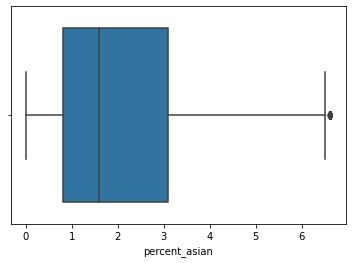

percent_hispanic


/Users/sanjeevkulkarni/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


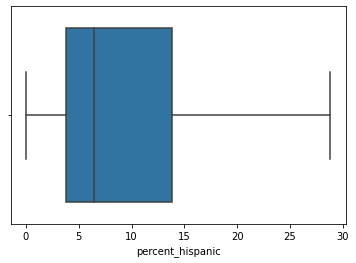

In [22]:
for i in df.drop(['school_type_encoded','size','name','school_type'], axis=1).columns:
    print(i)
    sns.boxplot(df[i],data = df)
    plt.show()

In [13]:
def outlier_treatment(data):
    for column in data.drop(['school_type_encoded','size','name','school_type'], axis=1).columns:
        if data[column].dtype != 'object':
            q1 = np.percentile(data[column],25)
            q3 = np.percentile(data[column],75)
            iqr = q3 - q1
            upper = q3 + (1.5 * iqr)
            lower = q1 - (1.5 * iqr)
            data.loc[:,column] = np.where(data[column].values > upper , upper, data[column].values)
            data.loc[:,column] = np.where(data[column].values < lower , lower, data[column].values)

    return data


df2 = outlier_treatment(df)
df2.columns

Index(['name', 'school_rating', 'size', 'reduced_lunch', 'state_percentile_16',
       'state_percentile_15', 'stu_teach_ratio', 'school_type', 'avg_score_15',
       'avg_score_16', 'full_time_teachers', 'percent_black', 'percent_white',
       'percent_asian', 'percent_hispanic', 'school_type_encoded'],
      dtype='object')

## Lets check for correlation

<AxesSubplot:xlabel='reduced_lunch', ylabel='size'>

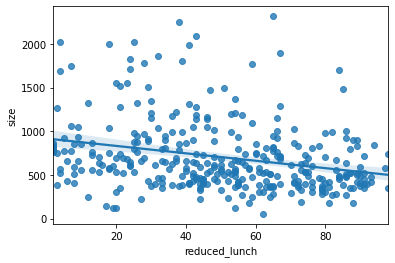

In [23]:
sns.regplot(x=df['reduced_lunch'],y=df['size'], fit_reg = True)

<AxesSubplot:xlabel='percent_asian', ylabel='size'>

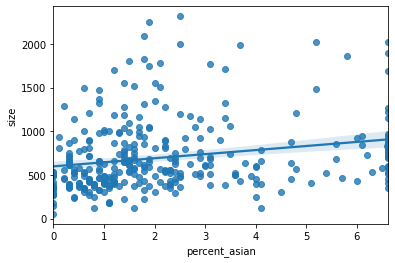

In [24]:
sns.regplot(x=df['percent_asian'],y=df['size'], fit_reg = True)

<AxesSubplot:xlabel='full_time_teachers', ylabel='size'>

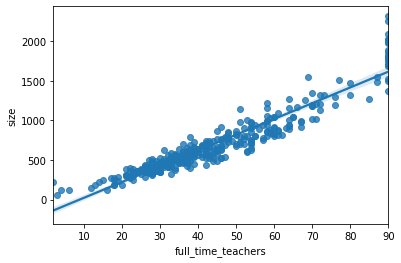

In [25]:
sns.regplot(x=df['full_time_teachers'],y=df['size'], fit_reg = True)

<AxesSubplot:>

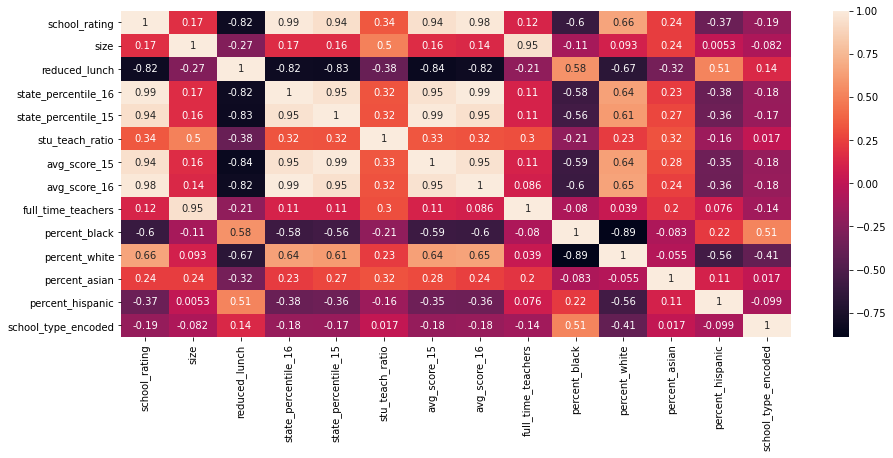

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df.corr(),annot = True)

In [33]:
X = df.drop(['size','name','school_type'],axis=1)
Y = df['size']

In [34]:
X.head()

,school_rating,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic,school_type_encoded
0,5.0,10.0,90.2,95.8,15.7,89.4,85.2,54.0,2.900,85.5,1.600,5.6,0
1,2.0,71.0,32.8,37.3,12.8,43.0,38.3,32.0,3.900,86.7,1.000,4.9,0
2,4.0,43.0,78.4,83.6,16.6,75.7,73.0,29.0,1.000,91.5,1.200,4.4,0
3,0.0,91.0,1.6,1.0,13.1,2.1,4.4,30.0,65.475,11.7,2.300,4.3,2
4,4.0,26.0,85.3,89.2,14.8,81.3,79.6,64.0,11.800,71.2,6.625,6.0,0


In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.25,
                                                    random_state = 41)

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = lm.predict(X_test)
y_pred

array([1675.85446896,  944.94053218, 1419.7449573 ,    6.58334297,
        373.74694602,  292.5899371 ,  975.24508543,  940.69165479,
       1714.06785879,  290.75952056,  431.3620856 ,  323.00407454,
        580.36622384,  764.05177758,  666.66432568,  198.90696702,
        510.85871871,  524.00102103,  547.19060472, 1095.58030111,
        919.08034094,  547.78518133, 1645.45180882,   88.09560506,
        925.46298115,  224.13585493,  367.40301752,  426.48940829,
       1342.20377469,  984.96411316, 1699.94825181,  385.2213863 ,
        329.34417022,  429.85912752,  593.61827362,  635.66975697,
        815.17761263,  540.77166776,  627.21202799, 1026.61943064,
        516.3646638 ,  307.7856285 ,  358.27544204,  864.1255648 ,
       1052.77121949, 1009.24928401,  505.51455623,  379.59257434,
        580.14594053,  708.8502424 ,  387.22914439,  466.14420049,
       1646.94544029,  319.83970397,  446.54616447,  659.06409392,
        755.6296433 ,  180.94722454,  626.48843896,  326.21921

In [38]:
display(lm.intercept_ , list(zip(lm.coef_, X_train.columns)))

-865.7390338764463

[(37.23051377404244, 'school_rating'),
 (0.03400453817349898, 'reduced_lunch'),
 (-1.654535335485056, 'state_percentile_16'),
 (2.593745154711588, 'state_percentile_15'),
 (41.06022237030892, 'stu_teach_ratio'),
 (-3.481029918431756, 'avg_score_15'),
 (-0.7274384835658027, 'avg_score_16'),
 (18.668372507549744, 'full_time_teachers'),
 (1.6154167071240826, 'percent_black'),
 (2.2429956614290356, 'percent_white'),
 (2.5929906102791263, 'percent_asian'),
 (1.2639085364330802, 'percent_hispanic'),
 (20.548561363453963, 'school_type_encoded')]

In [39]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [40]:
print('R^2:',metrics.r2_score(y_test, y_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9606873329145074
Adjusted R^2: 0.9535892124685157
MAE: 54.68014610440623
MSE: 6691.4139601012
RMSE: 81.80106331889091


In [42]:
y_train_pred = lm.predict(X_train)
# # Model Evaluation
print('R^2 Train:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE train:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))


# Testing Error(x_test_transformed)

y_pred = lm.predict(X_test)
print('\n R^2 Test:',metrics.r2_score(y_test,y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE test:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE test:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2 Train: 0.9443175185332956
Adjusted R^2: 0.9413138992010668
MAE train: 54.8501813317221
MSE train: 8740.254479725036
RMSE: 93.48932815955538

 R^2 Test: 0.9606873329145074
Adjusted R^2: 0.9535892124685157
MAE test: 54.68014610440623
MSE test: 6691.4139601012
RMSE: 81.80106331889091
